In [1]:
import pandas as pd
import numpy as np
import os

In [6]:
import os
import glob
import csv
file_count = 0
Rows = []
path = "odi_csv_male/*.csv"
for fname in glob.glob(path):
    if (fname.find("STAT_BAT")!=-1):
        file_count = file_count + 1
        if(file_count == 1):
            with open(fname, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                #next(csvreader)
                for row in csvreader:
                    Rows.append(row)
                    
        elif(file_count > 1):
            with open(fname, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                next(csvreader)
                for row in csvreader:
                    Rows.append(row)


with open("demo_batting_performance.csv", 'a') as csvoutput:
    writer = csv.writer(csvoutput, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for row in Rows:
        if(row != []):
            writer.writerow(row)

In [7]:
import os
import glob
import csv
file_count = 0
Rows = []
path = "odi_csv_male/*.csv"
for fname in glob.glob(path):
    if (fname.find("STAT_BOWL")!=-1):
        file_count = file_count + 1
        if(file_count == 1):
            with open(fname, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                for row in csvreader:
                    Rows.append(row)  
                    
        elif(file_count > 1): 
            with open(fname, 'r') as csvfile:
                csvreader = csv.reader(csvfile)
                next(csvreader)
                for row in csvreader:
                    Rows.append(row)


with open("demo_bowling_performance.csv", 'a') as csvoutput:
    writer = csv.writer(csvoutput, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for row in Rows:
        if(row != []):
            writer.writerow(row)

In [10]:
data = pd.read_csv('demo_batting_performance.csv')
del data['strike_rate_bat']
data

,PLAYERS,STRIKER,RUNS,Days
0,AD Mathews,11,17,1762
1,BJ Haddin,3,1,1762
2,CJ McKay,8,6,1762
3,CL White,43,35,1762
4,DPMD Jayawardene,15,5,1762
...,...,...,...,...
26514,ST Jayasuriya,29,11,164
26515,TM Dilshan,15,13,164
26516,TT Bresnan,21,16,164
26517,WPUJC Vaas,16,10,164


In [11]:
shortlisted_players = data.groupby('PLAYERS').filter(lambda x : len(x)>9)

In [12]:
shortlisted_players#['PLAYERS'].value_counts()

,PLAYERS,STRIKER,RUNS,Days
0,AD Mathews,11,17,1762
1,BJ Haddin,3,1,1762
2,CJ McKay,8,6,1762
3,CL White,43,35,1762
4,DPMD Jayawardene,15,5,1762
...,...,...,...,...
26514,ST Jayasuriya,29,11,164
26515,TM Dilshan,15,13,164
26516,TT Bresnan,21,16,164
26517,WPUJC Vaas,16,10,164


In [20]:
shortlisted_players.drop(shortlisted_players.loc[shortlisted_players['PLAYERS']=='PLAYERS'].index, inplace=True)
shortlisted_players

,PLAYERS,STRIKER,RUNS,Days
0,AD Mathews,11,17,1762
1,BJ Haddin,3,1,1762
2,CJ McKay,8,6,1762
3,CL White,43,35,1762
4,DPMD Jayawardene,15,5,1762
...,...,...,...,...
26514,ST Jayasuriya,29,11,164
26515,TM Dilshan,15,13,164
26516,TT Bresnan,21,16,164
26517,WPUJC Vaas,16,10,164


In [22]:
player_list = shortlisted_players['PLAYERS'].unique()
data.groupby('PLAYERS')['STRIKER', 'RUNS'].sum()
Runs = []
Bowls = []
SR = []
avg = []
performance = []
act_performance = [] #performance in the next match to be predicted


#player = player_list[0]
#score = data[data['PLAYERS'] == player]['RUNS'].astype(int).sum()
#bowls = data[data['PLAYERS'] == player]['STRIKER'].astype(int).sum()
#bowls_last = data[data['PLAYERS'] == player]['STRIKER'].astype(int).iloc[-1]
#bowls_last
count_appear = 0
for player in player_list:
    score = data[data['PLAYERS'] == player]['RUNS'].astype(int).sum()
    bowls = data[data['PLAYERS'] == player]['STRIKER'].astype(int).sum()
    count = data[data['PLAYERS'] == player].shape[0]
    SR.append(score/bowls)
    avg.append(score/count)
    Runs.append(score)
    Bowls.append(bowls)
    performance.append((score/bowls)*(score/count)) 
    score_last = data[data['PLAYERS'] == player]['RUNS'].astype(int).iloc[-1]
    bowls_last = data[data['PLAYERS'] == player]['STRIKER'].astype(int).iloc[-1]
    sr_last = score_last/bowls_last
    avg_last = score_last
    act_performance.append(sr_last*avg_last)



player_train = pd.DataFrame({'Players':player_list,
                             'Runs':Runs,
                             'Bowls':Bowls,
                             'SR':SR,
                             'avg':avg,
                             'performance':performance,
                             'act_performance': act_performance})

player_train.set_index('Players')

,Runs,Bowls,SR,avg,performance,act_performance
Players,,,,,,
AD Mathews,5027,6034,0.833112,30.840491,25.693594,0.000000
BJ Haddin,2941,3534,0.832201,28.278846,23.533697,44.023810
CJ McKay,190,343,0.553936,6.551724,3.629235,0.000000
CL White,2018,2528,0.798259,28.027778,22.373440,98.454545
DPMD Jayawardene,7310,9089,0.804269,32.488889,26.129803,14.769231
...,...,...,...,...,...,...
CJO Smith,172,253,0.679842,17.200000,11.693281,0.571429
DF Watts,240,426,0.563380,24.000000,13.521127,47.380282
GM Hamilton,214,395,0.541772,16.461538,8.918403,54.258065


In [23]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWar

In [24]:
x = player_train.iloc[:,1:-1]
y = player_train.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state=42, shuffle=True)


# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, input_dim=15, kernel_initializer = 'normal', activation='relu'))
    model.add(Dense(10, input_dim=15, kernel_initializer = 'normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    #print(model)
    return model


# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=40, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, x, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Baseline: -719.28 (520.10) MSE


In [17]:
#create an array for each unique values of player column in dataframe
#for each unique player value count total bowls, runs, calculate SR, avg, count_of_50+, performance_equation
#seperate last row for each players to predict and append it for file = (test_batsmen.csv)
#now append rest of the calculations and counts in one row for each player
#save the appended dataframe into (train_batsmen.csv)

In [25]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import ensemble

In [26]:
x = player_train.iloc[:,:-1]
y = player_train.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state=42, shuffle=True)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
	  'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)

del x_train['Players']
del x_test['Players']
model.fit(x_train, y_train)
print(x_train)
print(y_train)
#print(min(y_train))
#df.loc[['Value'].idxmax()]

     Runs  Bowls        SR        avg  performance
514   219    311  0.704180  21.900000    15.421543
218   108    143  0.755245   7.714286     5.826174
210   589    751  0.784288  14.023810    10.998700
124   812    730  1.112329  32.480000    36.128438
180    52     98  0.530612   4.000000     2.122449
..    ...    ...       ...        ...          ...
71    134    211  0.635071  13.400000     8.509953
106  4063   3748  1.084045  38.330189    41.551643
270   762    849  0.897527  12.491803    11.211724
435   133    200  0.665000   5.320000     3.537800
102   675    793  0.851198  11.440678     9.738282

[473 rows x 5 columns]
514    16.200000
218     1.230769
210     0.307692
124    51.020408
180     0.333333
         ...    
71     23.290323
106    45.125000
270    23.170213
435    11.111111
102     2.272727
Name: act_performance, Length: 473, dtype: float64


R2 sq:  0.7802621410915582


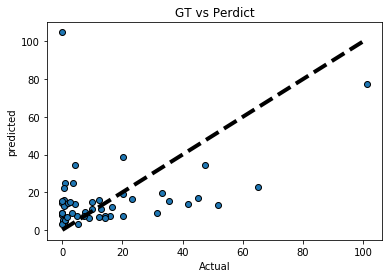

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_train, y_train)

print('R2 sq: ', model_score)

y_predicted = model.predict(x_test)
#print(y_test)
#print(y_predicted)
#mean squared error
#print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))

#explained variance score: 1 is perfect prediction
#print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('predicted')
ax.set_title("GT vs Perdict")
plt.show()



In [43]:
import pandas as pd
import numpy as np
import os

DF = pd.read_csv('Bat_data.csv')
del DF.index.name
del DF['Unnamed: 0']
#DF.columns = ['Batsman', 'Venue', 'Date', 'Opponent', 'Balls_faced', 'Runs_scored']
DF

#DF

,Batsman,Venue,Date,Opponent,Balls_faced,Runs_scored
0,Tamim Iqbal,Zahur Ahmed Chowdhury Stadium,2014/11/23,Zimbabwe,98,76
1,Tamim Iqbal,Zahur Ahmed Chowdhury Stadium,2011/03/14,Netherlands,4,0
2,Tamim Iqbal,Zahur Ahmed Chowdhury Stadium,2011/03/11,England,26,38
3,Tamim Iqbal,Zahur Ahmed Chowdhury Stadium,2011/12/06,Pakistan,1,0
4,Tamim Iqbal,Zahur Ahmed Chowdhury Stadium,2011/10/18,West Indies,62,36
...,...,...,...,...,...,...
25072,RT Lyons,Gymkhana Club Ground,2007/02/04,Kenya,3,5
25073,J Mulder,Greater Noida Sports Complex Ground,2017/03/15,Afghanistan,11,15
25074,Tanvir Ahmed (1),|||||||Kensington Oval|||,2011/05/02,West Indies,12,18
25075,SA Abbott,Sharjah Cricket Stadium,2014/10/07,Pakistan,7,3


In [52]:
DF.drop(DF.loc[DF['Date']=='DATE'].index, inplace=True)
DF['Date'] = pd.to_datetime(DF['Date'])
#R_Date = DF['Date']
Train_set_Batsman = DF.loc[DF.groupby('Batsman')['Date'].idxmax(), :]
Train_set_Batsman['SR'] = Train_set_Batsman['Runs_scored']/Train_set_Batsman['Balls_faced']*100
Train_set_Batsman['Performance'] = Train_set_Batsman['SR']*Train_set_Batsman['Runs_scored']
len(Train_set_Batsman['Performance'])

Train_set_Batsman

,Batsman,Venue,Date,Opponent,Balls_faced,Runs_scored,SR,Performance
9393,A Bagai,Maple Leaf North-West Ground,2013-08-29,Netherlands,17,3,17.647059,52.941176
12765,A Balbirnie,|||||||Civil Service Cricket Club|||,2019-07-07,Zimbabwe,9,5,55.555556,277.777778
24204,A Codrington,Jaffery Sports Club Ground,2007-02-05,Kenya,7,5,71.428571,357.142857
24940,A Dananjaya,|||||||R.Premadasa Stadium|||,2019-07-31,Bangladesh,1,0,0.000000,0.000000
15746,A Flintoff,|||||||Beausejour Stadium|||,2009-04-03,West Indies,6,3,50.000000,150.000000
...,...,...,...,...,...,...,...,...
24555,Zeeshan Maqsood,Mannofield Park,2019-08-21,Papua New Guinea,8,4,50.000000,200.000000
24241,Zeeshan Siddiqi,Hagley Oval,2014-01-23,Scotland,21,7,33.333333,233.333333
23380,Ziaur Rahman,Shere Bangla National Stadium,2014-06-17,India,2,0,0.000000,0.000000
23427,Zulfiqar Babar,Shere Bangla National Stadium,2015-04-22,Bangladesh,4,1,25.000000,25.000000


In [49]:
df = pd.read_csv('Bowl_DATA.csv', header = None)
df.columns = ['Bowler', 'Venue', 'Date', 'Opponent', 'Balls_bowled', 'Runs_given', 'Wickets']
df.drop(df.loc[df['Date']=='DATE'].index, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
Train_set_Bowler = df.loc[df.groupby('Bowler')['Date'].idxmax(), :]
Train_set_Bowler['Performance'] = (Train_set_Bowler['Wickets']*(Train_set_Bowler['Balls_bowled']/Train_set_Bowler['Runs_given']) + (Train_set_Bowler['Balls_bowled']/Train_set_Bowler['Runs_given']))
len(Train_set_Bowler['Performance'])




867

In [54]:
columns = ['player', 'Venue', 'Opponent','Tot_runs', 'Tot_SR', 'Tot_avg', 'Opp_runs', 'Opp_SR', 'Opp_avg',
           'Ven_runs', 'Ven_SR', 'Ven_avg', 'Performance']

List = []
for index, row in Train_set_Batsman.iterrows():
    #List.append(row['Batsman'])
    #List.append(row['Venue'])
    #List.append(row['Opponent'])
    score = DF[DF['Batsman'] == row['Batsman']]['Runs_scored'].astype(int).sum()
    bowls = DF[DF['Batsman'] == row['Batsman']]['Balls_faced'].astype(int).sum()
    count = DF[DF['Batsman'] == row['Batsman']].shape[0]
    
    Score = DF[(DF['Batsman'] == row['Batsman']) & (DF['Venue'] == row['Venue']) & (DF['Date'] == row['Date']) & (DF['Opponent'] == row['Opponent'])]['Runs_scored'].astype(int)
    Bowls = DF[(DF['Batsman'] == row['Batsman']) & (DF['Venue'] == row['Venue']) & (DF['Date'] == row['Date']) & (DF['Opponent'] == row['Opponent'])]['Balls_faced'].astype(int)
    Performance = int(Score/Bowls*100)
    #print(row['Performance'])
    SR = score/bowls
    avg = score/count
    Ven_score = DF[(DF['Batsman'] == row['Batsman']) & (DF['Venue'] == row['Venue'])]['Runs_scored'].astype(int).sum()
    Ven_bowls = DF[(DF['Batsman'] == row['Batsman']) & (DF['Venue'] == row['Venue'])]['Balls_faced'].astype(int).sum()
    Ven_count = DF[(DF['Batsman'] == row['Batsman']) & (DF['Venue'] == row['Venue'])].shape[0]
    Ven_SR = Ven_score/Ven_bowls
    Ven_avg = Ven_score/Ven_count
    Opp_score = DF[(DF['Batsman'] == row['Batsman']) & (DF['Opponent'] == row['Opponent'])]['Runs_scored'].astype(int).sum()
    Opp_bowls = DF[(DF['Batsman'] == row['Batsman']) & (DF['Opponent'] == row['Opponent'])]['Balls_faced'].astype(int).sum()
    Opp_count = DF[(DF['Batsman'] == row['Batsman']) & (DF['Opponent'] == row['Opponent'])].shape[0]
    Opp_SR = Opp_score/Opp_bowls
    Opp_avg = Opp_score/Opp_count
    #List.append(score)
    #List.append(SR)
    #List.append(avg)
    #List.append(Opp_score)
    #List.append(Opp_SR)
    #List.append(Opp_avg)
    #List.append(Ven_score)
    #List.append(Ven_SR)
    #List.append(Ven_avg)
    Ek_row = pd.DataFrame({'player':[row['Batsman']], 'Venue':[row['Venue']], 'Opponent':[row['Opponent']], 'Tot_runs':[score],
                  'Tot_SR':[SR], 'Tot_avg':[avg], 'Opp_runs':[Opp_score], 'Opp_SR':[Opp_SR], 'Opp_avg': [Opp_avg],
                  'Ven_runs':[Ven_score], 'Ven_SR':[Ven_SR], 'Ven_avg':[Ven_avg], 'Performance':[Performance]})
    with open('./Bat_train.csv','a') as bd:
        Ek_row.to_csv(bd,header=False,index=False)
#print(df_Bat)
    #print(List)
    

Ek_row

,player,Venue,Opponent,Tot_runs,Tot_SR,Tot_avg,Opp_runs,Opp_SR,Opp_avg,Ven_runs,Ven_SR,Ven_avg,Performance
0,Zulqarnain Haider,Dubai International Cricket Stadium,South Africa,48,0.685714,12.0,48,0.685714,12.0,30,0.9375,15.0,82


In [55]:
df_Bat = pd.read_csv('Bat_train.csv', header = None)
df_Bat.columns = ['player', 'Venue', 'Opponent','Tot_runs', 'Tot_SR', 'Tot_avg', 'Opp_runs', 'Opp_SR', 'Opp_avg', 'Ven_runs', 'Ven_SR', 'Ven_avg', 'Performance']
df_Bat

,player,Venue,Opponent,Tot_runs,Tot_SR,Tot_avg,Opp_runs,Opp_SR,Opp_avg,Ven_runs,Ven_SR,Ven_avg,Performance
0,A Bagai,Maple Leaf North-West Ground,Netherlands,558,0.632653,31.000000,26,0.382353,13.000000,8,0.222222,4.000000,17
1,A Balbirnie,|||||||Civil Service Cricket Club|||,Zimbabwe,839,0.723900,25.424242,253,0.829508,36.142857,26,0.666667,8.666667,55
2,A Codrington,Jaffery Sports Club Ground,Kenya,5,0.714286,5.000000,5,0.714286,5.000000,5,0.714286,5.000000,71
3,A Dananjaya,|||||||R.Premadasa Stadium|||,Bangladesh,7,0.333333,3.500000,0,0.000000,0.000000,0,0.000000,0.000000,0
4,A Flintoff,|||||||Beausejour Stadium|||,West Indies,781,0.855422,22.314286,43,0.716667,10.750000,3,0.428571,1.500000,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125,Zeeshan Maqsood,Mannofield Park,Papua New Guinea,26,0.490566,6.500000,25,0.609756,12.500000,26,0.490566,6.500000,50
1126,Zeeshan Siddiqi,Hagley Oval,Scotland,7,0.333333,7.000000,7,0.333333,7.000000,7,0.333333,7.000000,33
1127,Ziaur Rahman,Shere Bangla National Stadium,India,124,1.097345,11.272727,20,1.176471,6.666667,14,0.736842,4.666667,0
1128,Zulfiqar Babar,Shere Bangla National Stadium,Bangladesh,35,0.875000,7.000000,1,0.250000,1.000000,1,0.250000,1.000000,25


In [56]:
Columns = ['player', 'Venue', 'Opponent', 'Tot_wkts', 'Tot_SR', 'Tot_avg', 'Opp_wkts', 'Opp_SR', 'Opp_avg', 'Ven_wkts', 'Ven_SR', 'Ven_avg', 'Performance']

for index, row in Train_set_Bowler.iterrows():
    wkts = df[df['Bowler'] == row['Bowler']]['Wickets'].astype(int).sum()
    bowls = df[df['Bowler'] == row['Bowler']]['Balls_bowled'].astype(int).sum()
    runs_given = df[df['Bowler'] == row['Bowler']]['Runs_given'].astype(int).sum()
    count = df[df['Bowler'] == row['Bowler']].shape[0]

    Wkts = df[(df['Bowler'] == row['Bowler']) & (df['Venue'] == row['Venue']) & (df['Date'] == row['Date']) & (df['Opponent'] == row['Opponent'])]['Wickets'].astype(int)
    Bowls = df[(df['Bowler'] == row['Bowler']) & (df['Venue'] == row['Venue']) & (df['Date'] == row['Date']) & (df['Opponent'] == row['Opponent'])]['Balls_bowled'].astype(int)
    Runs_given = df[(df['Bowler'] == row['Bowler']) & (df['Venue'] == row['Venue']) & (df['Date'] == row['Date']) & (df['Opponent'] == row['Opponent'])]['Runs_given'].astype(int)
    if (int(Runs_given) != 0):
        Performance = int(Wkts*Bowls/Runs_given + Bowls/Runs_given)
    else:
        Performance = 0
    
    SR = bowls/wkts
    avg = runs_given/wkts
    Ven_wkts = df[(df['Bowler'] == row['Bowler']) & (DF['Venue'] == row['Venue'])]['Wickets'].astype(int).sum()
    Ven_bowls = df[(df['Bowler'] == row['Bowler']) & (DF['Venue'] == row['Venue'])]['Balls_bowled'].astype(int).sum()
    Ven_runs_given = df[(df['Bowler'] == row['Bowler']) & (DF['Venue'] == row['Venue'])]['Runs_given'].astype(int).sum()
    Ven_count = df[(df['Bowler'] == row['Bowler']) & (DF['Venue'] == row['Venue'])].shape[0]
    Ven_SR = Ven_bowls/Ven_wkts
    Ven_avg = Ven_runs_given/Ven_wkts
    Opp_wkts = df[(df['Bowler'] == row['Bowler']) & (DF['Opponent'] == row['Opponent'])]['Wickets'].astype(int).sum()
    Opp_bowls = df[(df['Bowler'] == row['Bowler']) & (DF['Opponent'] == row['Opponent'])]['Balls_bowled'].astype(int).sum()
    Opp_runs_given = df[(df['Bowler'] == row['Bowler']) & (DF['Opponent'] == row['Opponent'])]['Runs_given'].astype(int).sum()
    Opp_count = df[(df['Bowler'] == row['Bowler']) & (DF['Opponent'] == row['Opponent'])].shape[0]
    Opp_SR = Opp_bowls/Opp_wkts
    Opp_avg = Opp_runs_given/Opp_wkts

    Ek_row = pd.DataFrame({'player':[row['Bowler']], 'Venue':[row['Venue']], 'Opponent':[row['Opponent']], 'Tot_wkts':[wkts],
                  'Tot_SR':[SR], 'Tot_avg':[avg], 'Opp_wkts':[Opp_wkts], 'Opp_SR':[Opp_SR], 'Opp_avg': [Opp_avg],
                  'Ven_wkts':[Ven_wkts], 'Ven_SR':[Ven_SR], 'Ven_avg':[Ven_avg], 'Performance':[Performance]})
    with open('./Bowl_trainset.csv','a') as bd:
        Ek_row.to_csv(bd,header=False,index=False)
#print(df_Bat)
    #print(List)
    


/home/rkyadav2710/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/rkyadav2710/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/rkyadav2710/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/rkyadav2710/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/rkyadav2710/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars
/home/rkyadav2710/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in long_scalars
/home/rkyadav2710/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series

In [57]:

df_Bowl = pd.read_csv('Bowl_trainset.csv', header = None)
df_Bowl.columns = ['player', 'Venue', 'Opponent','Tot_wkts', 'Tot_SR', 'Tot_avg', 'Opp_wkts', 'Opp_SR', 'Opp_avg', 'Ven_wkts', 'Ven_SR', 'Ven_avg', 'Performance']
df_Bowl

,player,Venue,Opponent,Tot_wkts,Tot_SR,Tot_avg,Opp_wkts,Opp_SR,Opp_avg,Ven_wkts,Ven_SR,Ven_avg,Performance
0,A Balbirnie,Dubai International Cricket Stadium,Afghanistan,1,30.000000,42.000000,0,NaN,NaN,0,NaN,NaN,0
1,A Codrington,Jaffery Sports Club Ground,Kenya,0,inf,inf,0,NaN,NaN,0,NaN,NaN,1
2,A Dananjaya,|||||||R.Premadasa Stadium|||,Bangladesh,8,30.375000,23.500000,0,NaN,NaN,0,NaN,NaN,2
3,A Flintoff,|||||||Beausejour Stadium|||,West Indies,60,32.166667,21.350000,14,30.142857,20.857143,0,NaN,NaN,9
4,A Kumble,|||||||Queen's Park Oval|||,Bermuda,8,48.375000,34.750000,0,NaN,NaN,2,82.5,48.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,Zain Abbas,National Stadium,Pakistan,1,38.000000,50.000000,0,NaN,NaN,0,NaN,NaN,1
863,Zakiullah Zaki,Sharjah Cricket Stadium,Netherlands,0,inf,inf,0,NaN,NaN,0,NaN,NaN,1
864,Zeeshan Maqsood,Mannofield Park,Papua New Guinea,6,36.000000,19.166667,0,NaN,NaN,0,NaN,NaN,4
865,Ziaur Rahman,Shere Bangla National Stadium,India,10,39.700000,29.000000,0,NaN,NaN,0,NaN,NaN,7


In [58]:
#df_Bowl.to_csv('Bowl_Trainset.csv', index=False)
df_Bat.to_csv('Bat_Trainset.csv', index=False)

In [59]:
from datetime import datetime
days = []



for i in range(DF.shape[0]):
    try:
        date = datetime.strptime(DF['Date'][i], '%Y/%m/%d')
        Year = date.year
        Month = date.month
        Date = date.day
        Year, Month, Date
        Day = Year*365 + Month*30 + Date

        Day = Day - 732223
        days.append(Day)
    except ValueError:
        print('idhar bhi same..')
    
DF['Day'] = days

del days

for i in range(df.shape[0]):
    try:
        date = datetime.strptime(df['Date'][i], '%Y/%m/%d')
        Year = date.year
        Month = date.month
        Date = date.day
        Year, Month, Date
        Day = Year*365 + Month*30 + Date

        Day = Day - 732223
        days.append(Day)
    except ValueError:
        print('abb idhar kyo..')

df['Day'] = days

del days
days = []


df

TypeError: strptime() argument 1 must be str, not Timestamp

In [60]:
df_Bowl.to_csv('Bowl_Trainset.csv', index=False)
#DF.to_csv('Bat_data.csv', index=False)